# TP 8 : Calcul de $\pi$

Pendant cette séance, nous allons nous intéresser à différentes méthodes permettant d’approcher $\pi$. Trois de ces méthodes sont dites _probabilistes_ et reposent sur des tirages de nombres aléatoires, une est dite _déterministe_ et n’utilise aucun nombre aléatoire.

In [1]:
# Import des modules
import numpy as np
import numpy.random as rd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as anim

## 1. Tir de fléchette sur une cible

Il s'agit de lancer aléatoirement des fléchettes dans un carré muni d'une cible. La cible sera le cercle de rayon 1 et de centre $(0;0)$ et les fléchette seront lancée dans le carré circonscrit.

![Cible](flechette.png)

La probabilité de lancer la fléchette dans la cible est donc le rapport entre les deux surface, soit 
\begin{equation*}
	p = \frac{\mathcal{A}_\text{cercle}}{\mathcal{A}_\text{carre}} = \frac{\pi}{2\times 2} = \frac{\pi}{4}
\end{equation*}
	Lorsque l'on tire un grand nombre de fléchettes, la loi des grands nombres indique que la proportion de fléchettes dans la cible converge vers cette quantité.


**Question 1.** Implémenter une fonction `lance_flechette` qui lance aléatoirement une fléchette dans le carré et renvoie vrai si la fléchette est dans la cible et faux sinon.

In [2]:
def lance_flechette():
    """ Lance une fléchette et indique si elle arrive ou non dans la cible """
    return (2*rd.random()-1)**2 + (2*rd.random()-1)**2 <= 1.0

**Question 2.** Ecrire une fonction `pi_flechette` qui prend en argument un entier $N$, réalise $N$ lancés de fléchette, trace l'estimation de $\pi$ obtenue au fur et à mesure et renvoie l'estimation obtenue après $N$ lancés.

In [3]:
def pi_flechette(N=1000):
    """ Estime pi à partir du lancé de fléchettes """
    
    results = (2*rd.random(N) - 1)**2 + (2*rd.random(N) - 1)**2 <= 1
    approx = 4.0*results.cumsum()/np.arange(1, N+1) # cumsum: cumulative sum
    
    fig, ax = plt.subplots()
    ax.plot(range(1, N+1), approx)
    ax.grid(True)
    
    return approx[-1]

**Question 3.** Tester la fonction `pi_flechette` avec $N=10000$.

<IPython.core.display.Javascript object>


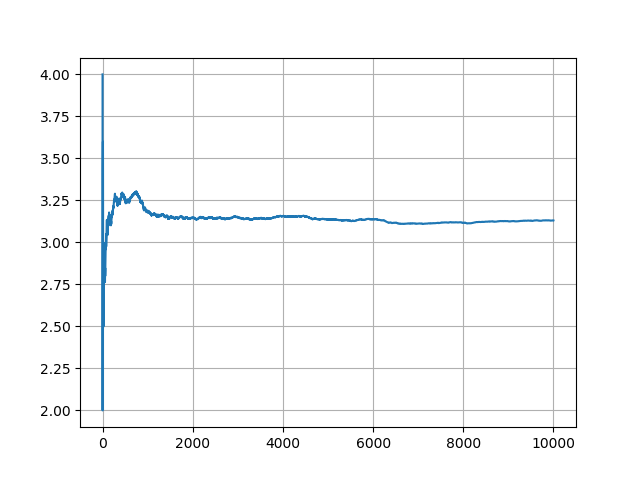

3.1308


In [4]:
print(pi_flechette(10000))

## 2. Aiguille de Buffon 

Cette méthode est, elle aussi, basée sur un lancer aléatoire. On considère un parquet dont les lames font une largeur $\ell$ et sont posées en lignes (parquet à coupe). On laisse tomber, de façon aléatoire, des aiguilles de longueur $a$ sur le plancher et on compte la proportion de ces aiguilles qui sont à cheval sur deux lignes de parquet (on dira qu'elles coupent les lignes formées par le parquet).

![Aiguille de Buffon](buffon.png)

Par la loi des grands nombres, ce ratio converge vers la probabilité qu'une aiguille coupe une ligne de parquet. Cette probabilité est proportionnelle à $1/\ell$ (plus les lignes sont espacées moins il y a de chance de les croiser) et à $a$. On peut montrer que, avec la méthode utilisée dans ce TP, la probabilité qu'une aiguille coupe une ligne de parquet vaut $\frac{a \pi}{4 \ell}$. Afin de simplifier, on prendra dans ce TP $a = \ell = 1$.
    
Pour aller plus loin : https://fr.wikipedia.org/wiki/Aiguille_de_Buffon

**Attention : à la fin de cet exercice, un code fourni fera une animation des aiguilles sur le parquet. Pour que cette animation marche correctement, il faut respecter strictement les consignes des questions sur les noms du module et des fonctions, ainsi que les paramètres des fonctions et leurs valeurs de retour.**

**Question 1.** Créer une fonction `dessin_parquet` qui dessine les lattes du parquet. Cette fonction doit prendre en argument un _objet d'axes_ `ax` pour y faire le dessin. Afin de simplifier les choses, et comme cela ne change en rien la qualité de l'approximation trouvée, nous prendrons des lattes horizontales, de largeur unitaire et de longueur infinie. Il s'agit donc, pour tout entier $n$ compris entre 0 et 10, de dessiner la droite $y=n$. On la représentera uniquement sur le domaine $[0, 10]$. L'appel de `plt.show()` devra être fait en dehors de cette fonction (pour pouvoir afficher les aiguilles et le parquet sur une même figure).

In [2]:
def dessin_parquet(ax):
    """ Dessine les lattes du parquet """
    for i in range(11):
        ax.plot([0, 10], [i, i], 'k')

**Question 2. _Jet d'une aiguille_.** Pour jeter une aiguille, il faut déterminer aléatoirement la position de ses deux extrémités $A$ et $B$ en garantissant que leur distance sera de $a = 1$.

<img src="jet_aig.png" alt="Jet_aiguille" width="120" />

Pour ce faire, on choisira les coordonnées $(x_A, y_A)$ de $A$ de façon aléatoire. Ensuite, on tirera un nombre aléatoire $s$ dans l'intervalle $[-1, 1]$ et on calculera les coordonnées $(x_B, y_B)$ de $B$ par $x_B = x_A + s$ et $y_B = y_A \pm \sqrt{1 - s^2}$, où le signe $+$ ou $-$ devant la racine sera choisi de façon aléatoire avec une probabilité de $\frac{1}{2}$ pour chaque signe.

**2 a.** Écrire une fonction `jette_aiguille()` qui détermine aléatoirement les coordonnées $(x_A, y_A)$ de l'extrémité $A$ dans le carré $[1, 9] \times [1, 9]$ et le nombre $s \in [-1, 1]$, et que calcule les coordonnées $(x_B, y_B)$ de $B$ par les formules ci-dessus en choisissant un signe aléatoire pour le calcul de $y_B$. Cette fonction devra renvoyer sous forme d'un tableau $2\times2$ les coordonnées de $A$ dans la première ligne et celles de $B$ dans la seconde.

In [3]:
def jette_aiguille():
    """ Jette aléatoirement une aiguille et renvoie les coordonnées de ces extrémités """
    xa = 1 + 8*rd.random()
    ya = 1 + 8*rd.random()
    s = 2*rd.random() - 1
    signe = 2*(rd.random() < 0.5) - 1
    xb = xa + s
    yb = ya + signe*np.sqrt(1 - s**2)
    return np.array([[xa, ya], [xb, yb]])

**2. b** Ecrire une fonction `calcule_intersection` qui prend en argument le tableau renvoyé par `jette_aiguille()` et renvoie vrai si l'aiguille est à cheval sur 2 lattes, faux sinon. On pourra remarquer que le numéro de la latte sur laquelle se trouve une position est donné par la partie entière de l'ordonnée de la position ($n = \lfloor y \rfloor$).

In [7]:
def calcule_intersection(AB):
    return np.floor(AB[0, 1])!=np.floor(AB[1, 1])

**Question 3. _Approximation de $\pi$_.**

Définir dans la cellule suivante une variable `nb_ite` (prendre par exemple 512) ; elle correspondra au nombre d'aiguilles à jeter. Définir une autre variable `ralenti = 1` qui vous servira à ralentir (en augmentant sa valeur) ou à accélérer l'animation.

In [7]:
nb_ite = 1000
ralenti = 1

Exécuter la cellule suivante : elle réalise `nb_ite` jets d'aiguille à l'aide de votre fonction `jette_aiguille`, les dessine et affiche dans le même temps l'approximation de $\pi$ obtenue en fonction du nombre de tirages, calculée à l'aide de votre fonction `calcule_intersection`.

_Remarque_ : Au besoin, la taille de la figure peut être modifiée en modifiant la valeur de `figsize` à la ligne 4 de la cellule ci-dessous.

In [2]:
# calcule_et_dessine

# Création des 2 figures
fig = plt.figure(figsize=(7,8))
ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2 = plt.subplot2grid((4, 1), (3, 0))
# Réglage pour l'affichage du parquet et des aiguilles
ax1.set_title("Jet d'aiguille")
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
dessin_parquet(ax1)
# Réglage pour l'affichage de l'estimation de pi
ax2.set_title('Estimation de $\pi$')
ax2.set_xlabel('nombre de tirage')
ax2.set_ylabel('estimation de $\pi$')
ax2.set_ylim(1,5)
ax2.plot([0,nb_ite-1],[np.pi,np.pi],'b',label="valeur de référence")

# Sous-graphique du haut : intialisation d'une ligne par aiguille.
lines = [ax1.plot([], [], lw=2)[0] for _ in range(nb_ite)]
# Sous-graphique du bas : initialisation d'une ligne pour mettre à jour la valeur de pi.
line2, = ax2.plot([], [], color='r', label="estimation")
ax2.legend()
lines.append(line2)

# Initialisation des tableaux de données.
xdata, y2data = [0], [0]
ite =0
def run(data):
    # Mise à jour du nombre de lancé
    t = data
    xdata.append(t)
    
    ## Ajout d'une nouvelle aiguille.
    aig0=jette_aiguille()
    xa=[aig0[0,0],aig0[1,0]]
    ya=[aig0[0,1],aig0[1,1]]
    lines[t].set_data(xa,ya)
    
    ## Mise à jour de l'estimation de pi   
    # Mise à jour des axes pour suivre le nombre de lancé.
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(0, 1.5*xmax)
    # Ajout de la nouvelle estimation de pi
    prev = y2data[-1]/4
    y2= (t*prev +calcule_intersection(aig0))/(t+1)
    y2 = y2*4
    y2data.append(y2)
    lines[-1].set_data(xdata, y2data)
    print("tot")
    return lines

x = np.arange(0,nb_ite)#np.linspace(0, 2*np.pi, 128)
ax2.set_xlim(0,10)

ani = anim.FuncAnimation(fig, run, frames=x, repeat=False)
plt.show()

NameError: name 'plt' is not defined

In [10]:
print("Valeur estimée de pi : ",y2data[-1])

Valeur estimée de pi :  3.159999999999999


## 3. Calcul d'une intégrale

Cette dernière famille de méthodes consiste à estimer $\pi$ à partir de l'intégralde de la fonction $\arctan$ sur l'intervalle $[0, 1]$ :
$$\int_0^1 \frac{\mathrm{d}x}{1+x^2} = \Bigl[ \arctan x \Bigr]_0^1 = \frac{\pi}{4}.$$
On cherche donc à approcher cette intégrale pour estimer $\pi$. Nous verrons ici deux méthodes pour le faire.

### Méthode déterministe pour le calcul d'intégrale

#### Principe général
Les intégrales les plus simpes à calculer sont les polynômes de petit degrès. Le cas extrème consiste à prendre $f$ constante égale à $K$, son intégrale sur le segment $[a;b]$ est alors égale à $K(b-a)$.

Ici la fonction n'est pas constante mais elle est trés régulière (elle est de classe $\mathcal{C}^{\infty}$). Sur un petit segment $[a,b]$, l'inégalité des accroissements finis fournit :

\begin{equation*}
\forall x \in [a,b], \big\vert f(x) - f(a) \big\vert \leqslant \max_{y\in [a,b]}\big\vert f'(y)\big\vert \vert x -a\vert = \max_{y\in [a,b]}\big\vert f'(y)\big\vert (x -a)
\end{equation*}

**Question 1.** Majorer l'éccart entre $I$, l'intégrale de $f$ sur $[a;b]$ et $I_a$, l'intégrale de la fonction constante $x\mapsto f(a)$ sur le même intervalle.

Réponse :

#### Retour au problème de départ
Ici $f^\prime(x) = -2x/(1+x^2)^2$ est majorée par $1$:
\begin{align}
    (\lvert x \rvert - 1) ^2 \geq 0 & \iff x^2 - 2 \lvert x \rvert + 1 \geq 0 \\
    & \iff 2 \lvert x \rvert \leq 1 + x^2 \\
    & \implies 2 \lvert x \rvert \leq (1 + x^2)^2 \quad \text{car $1+x^2 \geq 1$} \\
    & \implies \bigl\lvert f^\prime(x) \bigr\rvert \leq 1
\end{align}
Par ailleurs $b-a$ est égal à 1 si on utilise cette approximation directement sur $[a;b]=[0;1]$. L'idée précédente fournirait donc une erreur de l'ordre majorée par $1$ ce qui n'est pas satisfaisant.

Essayons autrement, appliquons cette méthode sur un petit segment $[a;b]=[x_i;x_{i+1}]$ avec $x_i = i \Delta x$ pour $i$ compris entre 0 et $N$ et $\Delta x = 1/N$ : cette fois-ci, l'erreur, sur un petit segment est de $\frac{\Delta x^2}{2} = \frac{1}{2 N^2}$ ce qui est petit pour $N$ grand (par exemple 100, 1000 ou 10 000).
L'idée est alors de mettre bout à bout ces petits segments en remarquant que $x_0 =0$ et $x_N = 1$ :

\begin{equation*}
I = \int_0^1 \frac{\mathrm{d}x}{1+x^2} = \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2}
\end{equation*}

**Question 2.** À l'aide de la question précédente, estimer la différence entre $I$ et la somme des intégrales $\int_{x_i}^{x_{i+1}} \frac{\mathrm{d}x}{1+x^2}$

Réponse:

![Méthode des rectangles à gauches](approx_int.png)

Pour estimer l'intégrale de $f$, nous allons donc calculer, numériquement :
\begin{equation*}
	I_{\Delta x} = \sum_{i=0}^{N -1} f(i \Delta x) \Delta x,
\end{equation*}
avec $\Delta x = (b-a)/N$ . Pour tester vos codes, vous pourrez prendre $\Delta x = 10^{-k}$ avec $k=1, 2$ ou $3$.

**Question 3.**

**3 a.** Écrire une fonction `pi_int_rect(n)` qui calcule l'approximation de l'intégrale sur $[0;1]$ de $f(x) = \frac{1}{1+x^2}$ puis s'en sert pour renvoyer une approximation de $\pi$.

In [11]:
def f(x):
    return 1./(1.+x**2)

def pi_int_rect(n):
    x = np.linspace(0, 1, n+1)
    dx = x[1] - x[0]
    I = (f(x)*dx).sum()
    return 4*I

print("Estimation pour n=10000 : ",pi_int_rect(10000))

Estimation pour n=10000 :  3.1418926519231265


**3 b.** Écrire une fonction `dessine_pi_rect(N)` qui dessine l'approximation de $\pi$ obtenue pour différentes valeurs de $n$ réparties intelligemment entre $0$ et $N$. Par exemple, on pourra tracer l'approximation pour $n=1, 2, 4, 8, 16, 32, \dotsc $ jusqu'à dépasser $N$ (il s'agit donc de prendre 2 fois plus de points à chaque étape).

<IPython.core.display.Javascript object>


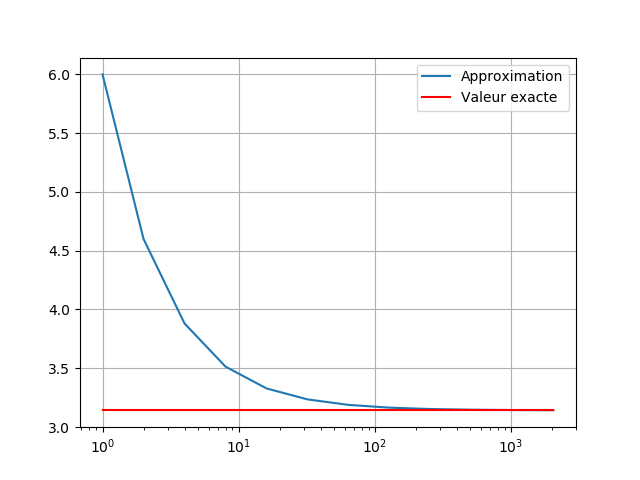

In [12]:
def dessine_pi_int_rect(N=4096):
    """ Estime Pi à partir du calcul de l'intégrale par la méthode
    des rectangles à gauche et affiche le résultat obtenu en fonction de n."""
    n = 2**np.arange(0, int(np.ceil(np.log2(N))))
    pi = np.zeros(n.shape)
    for i in range(n.size):
        pi[i] = pi_int_rect(n[i])
    fig, ax = plt.subplots()
    ax.semilogx(n, pi, label="Approximation")
    ax.semilogx([n[0], n[-1]], [np.pi, np.pi], 'r', label="Valeur exacte")
    ax.legend()
    ax.grid(True)

dessine_pi_int_rect()

### Méthode probabiliste pour le calcul d'intégrale : méthode de Monte-Carlo

L'intégrale $\int_0^1 \frac{\mathrm{d} x}{1 + x^2}$ est aussi égale à l'aire sous la courbe de la fonction $\frac{1}{1 + x^2}$ sur l'intervalle $[0, 1]$. Rappelons que la fonction prend des valeurs comprises entre 0 et 1 sur cet intervalle.

Comme pour le tir de fléchette, cette aire peut être approchée en choisissant aléatoirement des points dans $[0;1]\times[0;1]$ et en comptant la proportion des points qui sont entre la courbe et l'axe des abscisses.

Cette proportion converge alors vers l'aire sous la courbe divisée par l'aire de $[0;1]\times[0;1]$ qui vaut $1$. Cette méthode de calcul d'intégrale s'appelle la méthode de Monte-Carlo.

**Question 1.** Écrire une fonction `ajout_tirage()` qui tire aléatoirement un point et vérifie s'il est sous la courbe (renvoyer vrai si c'est le cas, faux sinon).

In [13]:
def ajout_tirage():
    """ Tire un point aléatoire et indique s'il est sous la courbe ou non. """
    x = rd.random()
    y = rd.random()
    return y <= 1/(1 + x**2)

**Question 2.** Écrire une fonction `pi_int_mc(n)` qui approche l'intégrale recherché par la méthode de Monte-Carlo en tirant $n$ points aléatoirement. Cette fonction devra afficher dans un graphe l'estimation de $\pi$ au fur et à mesure des tirage de nombre aléatoire (comme cela avait été fait pour les fléchettes) puis renvoyer l'estimation finale de $\pi$.

<IPython.core.display.Javascript object>


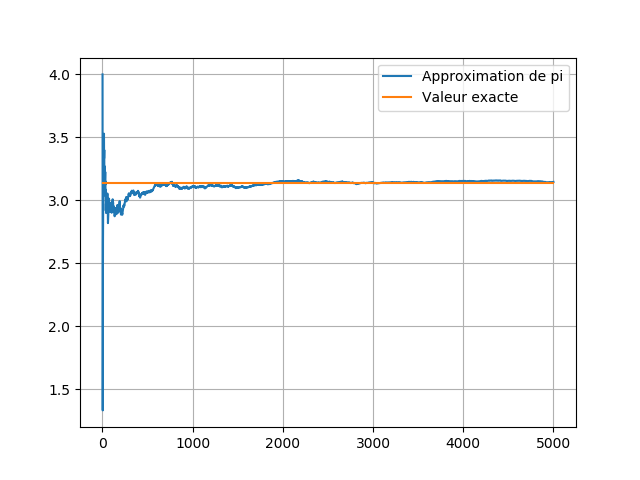

3.1464


In [20]:
def pi_int_mc(n=5000):
    """ Estime Pi à partir de la méthode de Monte-Carlo """
    points = rd.random((2, n))
    results = points[1, :] <= 1/(1+points[0, :]**2)
    approx = 4.0*results.cumsum()/np.arange(1, n+1) # cumsum: cumulative sum
    
    fig, ax = plt.subplots()
    ax.plot(range(1, n+1), approx, label="Approximation de pi")
    ax.plot([1, n], [np.pi, np.pi], label="Valeur exacte")
    ax.legend()
    ax.grid(True)
    
    return approx[-1]
    
print(pi_int_mc())

### Pour aller plus loin
Supposons que l'on modifie le calcul de l'intégrale par la méthode déterministe des rectangles : au lieu de prendre $f(x_i)$ comme hauteur du rectangle, on considère la valeur au milieu, $f\bigl(\frac{x_i+x_{i+1}}{2}\bigr)$. Dans cette question on approchera donc $I$ par 
\begin{equation*}
	I_{\text{mid},\Delta x} = \sum_{i=0}^{n -1} f[(i+0.5) \Delta x] \Delta x,
\end{equation*}

**Question 1.** Écrire une fonction `pi_int_mid(n)` qui calcule l'approximation de l'intégrale sur $[0;1]$ de $f(x) = \frac{1}{1+x^2}$ puis s'en sert pour renvoyer une approximation de $\pi$.

In [18]:
def pi_int_mid(n):
    x = np.linspace(0, 1, n+1)
    dx = x[1] - x[0]
    I = (f(x + 0.5*dx)*dx).sum()
    return 4*I
    

**Question 2.** Écrire une fonction `dessine_pi_int_compare(N)` qui dessine dans un même graphe les approximations de $\pi$ obtenues avec les fonctions `pi_int_rect` et `pi_int_mid` avec différentes valeurs de $n$ réparties intelligemment entre 0 et $N$. Par exemple, on pourra tracer l'approximation pour $n=1, 2, 4, 8, 16, 32, \dotsc $ jusqu'à dépasser $N$ (il s'agit donc de prendre 2 fois plus de points à chaque étape).

<IPython.core.display.Javascript object>


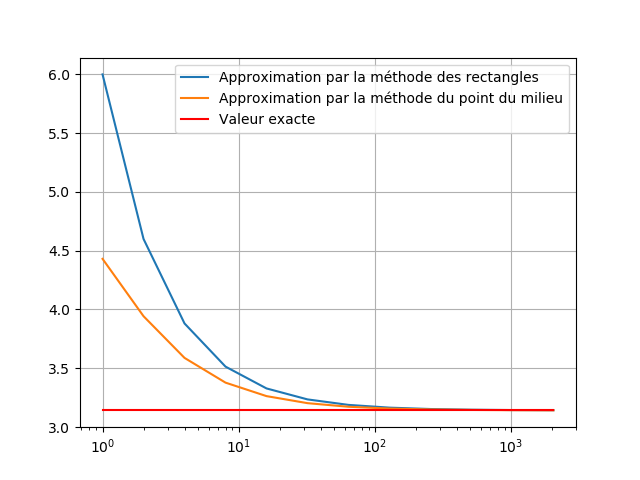

In [19]:
def dessine_pi_int_compare(N=4096):
    """ Estime Pi à partir de deux méthodes déterministe de calcul de l'intégrale
    et affiche le résultat obtenu en fonction de n."""
    n = 2**np.arange(0, int(np.ceil(np.log2(N))))
    pi1 = np.zeros(n.shape)
    pi2 = np.zeros(n.shape)
    for i in range(n.size):
        pi1[i] = pi_int_rect(n[i])
        pi2[i] = pi_int_mid(n[i])
    fig, ax = plt.subplots()
    ax.semilogx(n, pi1, label="Approximation par la méthode des rectangles")
    ax.semilogx(n, pi2, label="Approximation par la méthode du point du milieu")
    ax.semilogx([n[0], n[-1]], [np.pi, np.pi], 'r', label="Valeur exacte")
    ax.legend()
    ax.grid(True)

dessine_pi_int_compare()